In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/ML PROJECT 2024/kidney_disease.csv'
df = pd.read_csv(path)

### **DATASET EXPLORATION**

In [ ]:
print("The dataset shape is {}".format(df.shape))

The dataset shape is (400, 26)


In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [ ]:
# find unique values of each feature
for col in df:
    unique=df[col].value_counts()
    print(unique,"\n========================= \n")

id
0      1
263    1
273    1
272    1
271    1
      ..
130    1
129    1
128    1
127    1
399    1
Name: count, Length: 400, dtype: int64 

age
60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: count, Length: 76, dtype: int64 

bp
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: count, dtype: int64 

sg
1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: count, dtype: int64 

al
0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: count, dtype: int64 

su
0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: count, dtype: int64 

rbc
normal      201
abnormal     47
Name: count, dtype: int64 

pc
normal      259
abnormal     76
Name: count, dtype: int64 

pcc
notpresent    354
present        42
Name: count, dtype: int64 

ba
notpresent    374
present        22
Name: c

### **DATA PREPROCESSING**
<!--  -->        


#### *Remove unwanted columns*


In [ ]:
# remove "id" feature
df.drop('id',axis=1,inplace=True)

#### *Data cleaning*  
<!--  -->       


In [ ]:
# cleaning 'PCV'
df['pcv']=df['pcv'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\t43','43').replace('\t?','Nan'))

# cleaning "WC"
df['wc']=df['wc'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\t?','Nan').replace('\t6200','6200').replace('\t8400','8400'))

# cleaning "RC"
df['rc']=df['rc'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\t?','Nan'))

# cleaning "dm"
df['dm']=df['dm'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\tno','no').replace('\tyes','yes').replace(' yes','yes'))

# cleaning "CAD"
df['cad']=df['cad'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\tno','no'))

# cleaning "Classification"
df['classification']=df['classification'].apply(lambda x:x if type(x)==type(3.5) else x.replace('ckd\t','ckd'))

In [ ]:
mistyped=[['pcv','rc','wc']]
for i in mistyped:
    df[i]=df[i].astype('float')

In [ ]:
#  define categoricsl features
cat_cols=list(df.select_dtypes('object'))
cat_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [ ]:
# define numeric features
num_cols=list(df.select_dtypes(['int64','float64']))
num_cols

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

#### *Handling NULL Values*

In [ ]:
# Checking missing/Nan values
df.isnull().sum().sort_values(ascending=False)

rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
# Impute Nan Values with median in numeric features
for col in num_cols:
    df[col]=df[col].fillna(df[col].median())

In [ ]:
# Impute categorical features with mode
df['rbc'].fillna('normal',inplace=True)
df['pc'].fillna('normal',inplace=True)
df['pcc'].fillna('notpresent',inplace=True)
df['ba'].fillna('notpresent',inplace=True)
df['htn'].fillna('no',inplace=True)
df['dm'].fillna('no',inplace=True)
df['cad'].fillna('no',inplace=True)
df['appet'].fillna('good',inplace=True)
df['pe'].fillna('no',inplace=True)
df['ane'].fillna('no',inplace=True)

In [ ]:
df.isna().sum().sort_values(ascending=False)

age               0
pot               0
ane               0
pe                0
appet             0
cad               0
dm                0
htn               0
rc                0
wc                0
pcv               0
hemo              0
sod               0
bp                0
sc                0
bu                0
bgr               0
ba                0
pcc               0
pc                0
rbc               0
su                0
al                0
sg                0
classification    0
dtype: int64

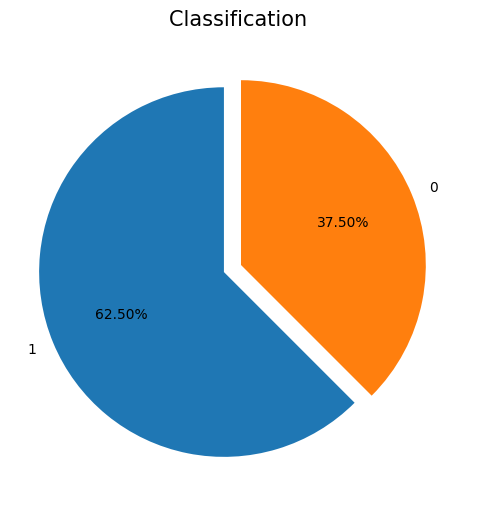

In [ ]:
df['classification']=df['classification'].map({'ckd':1,'notckd':0})

attr_count=df['classification'].value_counts()
attr_label=df['classification'].value_counts().index

# plot
fig,ax=plt.subplots(figsize=(14,6))
ax.pie(attr_count,explode=(0.1,0),labels=attr_label,autopct='%.2f%%',startangle=90)
ax.set_title("Classification ",fontsize=15)
plt.show()

### **DATA VISUALIZATION**

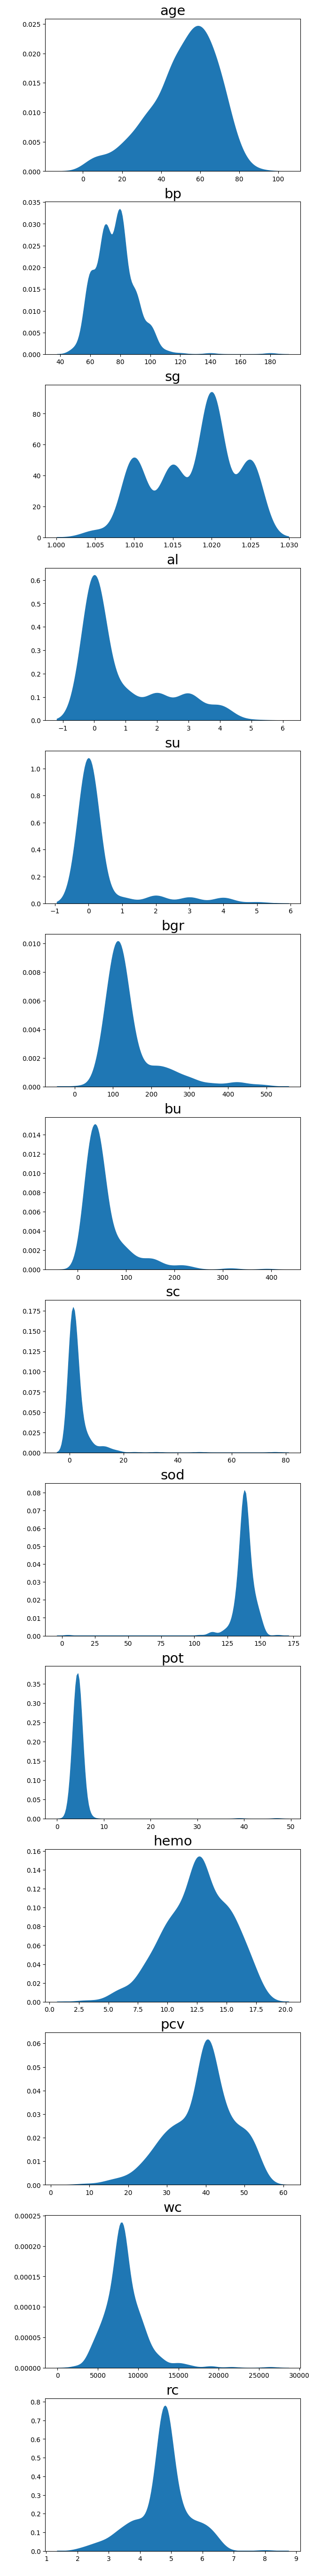

In [ ]:
fig,ax=plt.subplots(figsize=(7,70),ncols=1,nrows=14)

i=0
for col in num_cols:
    sns.kdeplot(x=df[col],fill=True,alpha=1,ax=ax[i])
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(' ')
    ax[i].set_title(col,fontsize=21)
    i=i+1
plt.show()

In [ ]:
# check skewness of the distribution
skew=[]
for col in num_cols:
    skew.append(round(df[col].skew(),3))
num_dist=pd.DataFrame({'features':num_cols,'skewness':skew})
num_dist

,features,skewness
0,age,-0.689
1,bp,1.602
2,sg,-0.333
3,al,1.180
4,su,2.700
5,bgr,2.204
6,bu,2.724
7,sc,7.666
8,sod,-7.929
9,pot,13.133


In [ ]:
df.drop('pcv',axis=1,inplace=True)
num_cols.remove('pcv')

In [ ]:
tg_num_corr=[]

for col in num_cols:
    tg_num_corr.append(df[col].corr(df['classification']))

# create as DataFrame
tg_num_df=pd.DataFrame({'numerical_predictor':num_cols,'correlation_w_target':tg_num_corr})

# sort the DF by the absolute vaue of their correlation coefficient,descending
tg_num_df=tg_num_df.sort_values(by='correlation_w_target',ascending=False).reset_index(drop=True)

tg_num_df

,numerical_predictor,correlation_w_target
0,al,0.531562
1,bgr,0.379321
2,bu,0.369393
3,su,0.294555
4,bp,0.293693
5,sc,0.291245
6,age,0.227842
7,wc,0.177571
8,pot,0.065218
9,sod,-0.334900


#### *Encoding*

In [ ]:
df['rbc']=df['rbc'].map({'normal':0,'abnormal':1})
df['pc']=df['pc'].map({'normal':0,'abnormal':1})
df['pcc']=df['pcc'].map({'notpresent':0,'present':1})
df['ba']=df['ba'].map({'notpresent':0,'present':1})
df['htn']=df['htn'].map({'no':0,'yes':1})
df['dm']=df['dm'].map({'no':0,'yes':1})
df['cad']=df['cad'].map({'no':0,'yes':1})
df['pe']=df['pe'].map({'no':0,'yes':1})
df['ane']=df['ane'].map({'no':0,'yes':1})
df['appet']=df['appet'].map({'good':0,'poor':1})

#### *Scaling*            


In [ ]:
# scaling with MinMaxScaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler
mm_scaler=MinMaxScaler()
df[num_cols]=mm_scaler.fit_transform(df[num_cols])

### **MODEL BUILDING**

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop('classification',axis=1)
y=df['classification']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("X_train size {} , X_test size {}".format(X_train.shape,X_test.shape))

X_train size (320, 23) , X_test size (80, 23)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(max_depth=5,n_estimators=5)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=5)

#### **MODEL EVALUATION**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred=rf.predict(X_test)
cm=confusion_matrix(y_pred,y_test)
cm

array([[28,  0],
       [ 0, 52]])

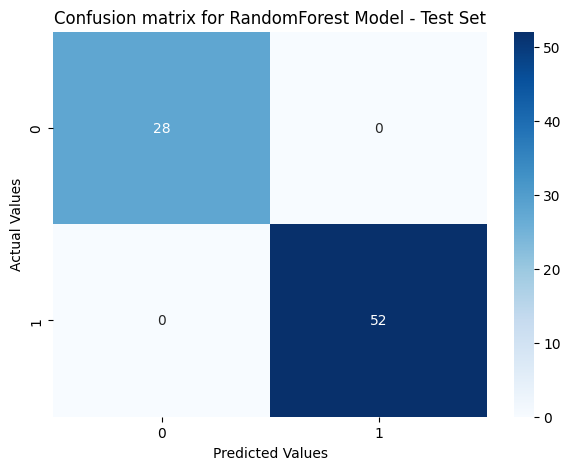

In [ ]:
plt.figure(figsize=(7,5))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for RandomForest Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
score=round(accuracy_score(y_test,y_pred),3)
print("Test accuracy: {}".format(score))

Test accuracy: 1.0


In [ ]:
# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [1]:
# Creating a confusion matrix for training set
y_train_pred=rf.predict(X_train)
cm=confusion_matrix(y_train,y_train_pred)
cm

NameError: name 'rf' is not defined

In [ ]:
# Accuracy score
score=round(accuracy_score(y_train,y_train_pred),3)
print("Train accuracy: {}".format(score))

Train accuracy: 0.991


In [ ]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       122
           1       0.99      0.99      0.99       198

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



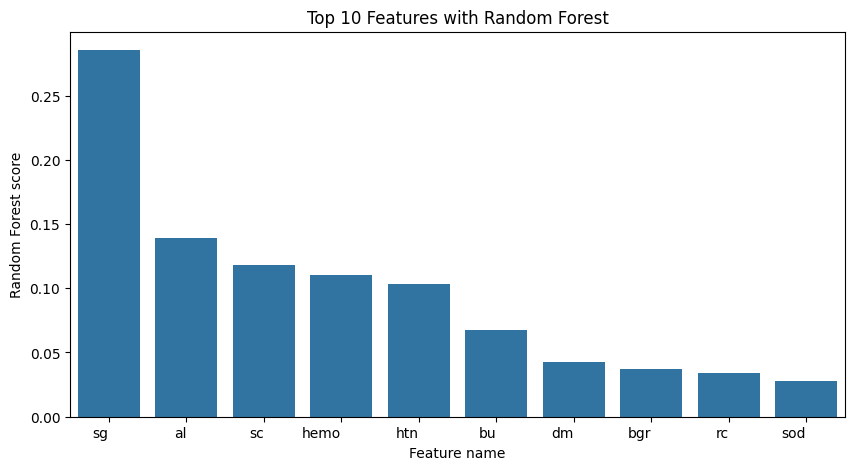

In [ ]:
# Top 10 Features
feature_scores=pd.DataFrame(rf.feature_importances_,columns=['Score'],index=X_train.columns).sort_values(by='Score',ascending=False)
top10_feature = feature_scores.nlargest(n=10, columns=['Score'])

plt.figure(figsize=(10,5))
g = sns.barplot(x=top10_feature.index, y=top10_feature['Score'])
p = plt.title('Top 10 Features with Random Forest')
p = plt.xlabel('Feature name')
p = plt.ylabel('Random Forest score')
p = g.set_xticklabels(g.get_xticklabels(), horizontalalignment='right')

### **PREDICTION**

In [ ]:
X_train=X_train[['hemo','rc','sg','al','sc','htn','sod','bp','wc','age']]
X_test=X_test[['hemo','rc','sg','al','sc','htn','sod','bp','wc','age']]
rf.fit(X_train,y_train)
def predict(hemo,rc,sg,al,sc,htn,sod,bp,wc,age):
    hemo=float(hemo)
    rc=float(rc)
    sg=float(sg)
    sc=float(sc)
    htn=int(htn)
    sod=float(sod)
    bp=float(bp)
    wc=float(wc)
    age=int(age)

    x=[[hemo,rc,sg,al,sc,htn,sod,bp,wc,age]]
    return rf.predict(x)

In [ ]:
# Prediction 1
# input parameter : Hemoglobin(hemo), Red Blood Cells(rc), Specific Gravity(sg), Albumin(al), Searum Creatinite(sc),
# Hypertension(htn), Sodium(sod), Blood Pressure(bp), White Blood Cells(wc), Age
prediction = predict(67.4,7.2,0.99,4,17.0,1,160.6,87,22089,36)[0]
if prediction:
  print('Chronic Kidney Disease detected.')
else:
  print("Chronic Kidney Diseasenot detected.")

Chronic Kidney Disease detected.


In [ ]:
dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred=dtc.predict(X_test)
cm=confusion_matrix(y_pred,y_test)
cm

array([[28,  1],
       [ 0, 51]])

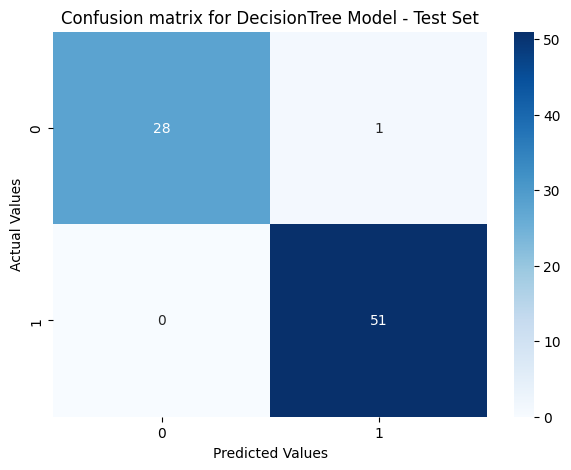

In [ ]:
plt.figure(figsize=(7,5))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for DecisionTree Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
score=round(accuracy_score(y_test,y_pred),3)
print("Test accuracy: {}".format(score))

Test accuracy: 0.988


In [ ]:
# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [ ]:
# Creating a confusion matrix for training set
y_train_pred=rf.predict(X_train)
cm=confusion_matrix(y_train,y_train_pred)
cm

array([[122,   0],
       [  1, 197]])

In [ ]:
# Accuracy score
score=round(accuracy_score(y_train,y_train_pred),3)
print("Train accuracy: {}".format(score))

Train accuracy: 0.997


In [ ]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       122
           1       1.00      0.99      1.00       198

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [ ]:
X_train=X_train[['hemo','rc','sg','al','sc','htn','sod','bp','wc','age']]
X_test=X_test[['hemo','rc','sg','al','sc','htn','sod','bp','wc','age']]
dtc.fit(X_train,y_train)
def predict(hemo,rc,sg,al,sc,htn,sod,bp,wc,age):
    hemo=float(hemo)
    rc=float(rc)
    sg=float(sg)
    sc=float(sc)
    htn=int(htn)
    sod=float(sod)
    bp=float(bp)
    wc=float(wc)
    age=int(age)

    x=[[hemo,rc,sg,al,sc,htn,sod,bp,wc,age]]
    return dtc.predict(x)

In [ ]:
# Prediction 1
# input parameter : Hemoglobin(hemo), Red Blood Cells(rc), Specific Gravity(sg), Albumin(al), Searum Creatinite(sc),
# Hypertension(htn), Sodium(sod), Blood Pressure(bp), White Blood Cells(wc), Age
prediction = predict(67.4,7.2,0.99,4,17.0,1,160.6,87,22089,36)[0]
if prediction:
  print('Chronic Kidney Disease detected.')
else:
  print("Chronic Kidney Disease not detected.")

Chronic Kidney Disease detected.


In [ ]:
# Prediction 2
# input parameter : Hemoglobin(hemo), Red Blood Cells(rc), Specific Gravity(sg), Albumin(al), Searum Creatinite(sc),
# Hypertension(htn), Sodium(sod), Blood Pressure(bp), White Blood Cells(wc), Age
prediction = predict(45.6,3.5,0.67,2,5.0,0,120.6,65,10000,20)[0]
if prediction:
  print('Chronic Kidney Disease detected.')
else:
  print("Chronic Kidney Disease not detected.")

Chronic Kidney Disease not detected.


In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred=lr.predict(X_test)
cm=confusion_matrix(y_pred,y_test)
cm

array([[28,  1],
       [ 0, 51]])

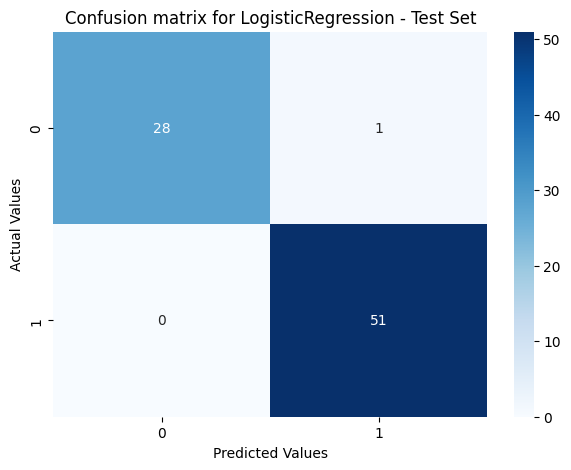

In [ ]:
plt.figure(figsize=(7,5))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for LogisticRegression - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
score=round(accuracy_score(y_test,y_pred),3)
print("Test accuracy: {}".format(score))

Test accuracy: 0.988


In [ ]:
# Creating a confusion matrix for training set
y_train_pred=lr.predict(X_train)
cm=confusion_matrix(y_train,y_train_pred)
cm

array([[122,   0],
       [ 13, 185]])

In [ ]:
# Accuracy score
score=round(accuracy_score(y_train,y_train_pred),3)
print("Train accuracy: {}".format(score))

Train accuracy: 0.959


In [ ]:
X_train=X_train[['hemo','rc','sg','al','sc','htn','sod','bp','wc','age']]
X_test=X_test[['hemo','rc','sg','al','sc','htn','sod','bp','wc','age']]
lr.fit(X_train,y_train)
def predict(hemo,rc,sg,al,sc,htn,sod,bp,wc,age):
    hemo=float(hemo)
    rc=float(rc)
    sg=float(sg)
    sc=float(sc)
    htn=int(htn)
    sod=float(sod)
    bp=float(bp)
    wc=float(wc)
    age=int(age)

    x=[[hemo,rc,sg,al,sc,htn,sod,bp,wc,age]]
    return lr.predict(x)

In [ ]:
# Prediction 1
# input parameter : Hemoglobin(hemo), Red Blood Cells(rc), Specific Gravity(sg), Albumin(al), Searum Creatinite(sc),
# Hypertension(htn), Sodium(sod), Blood Pressure(bp), White Blood Cells(wc), Age
prediction = predict(67.4,7.2,0.99,4,17.0,1,160.6,87,22089,36)[0]
if prediction:
  print('Chronic Kidney Disease detected.')
else:
  print("Chronic Kidney Disease not detected.")

Chronic Kidney Disease detected.


In [ ]:
# Prediction 2
# input parameter : Hemoglobin(hemo), Red Blood Cells(rc), Specific Gravity(sg), Albumin(al), Searum Creatinite(sc),
# Hypertension(htn), Sodium(sod), Blood Pressure(bp), White Blood Cells(wc), Age
prediction = predict(45.6,3.5,0.67,2,5.0,0,120.6,65,10000,20)[0]
if prediction:
  print('Chronic Kidney Disease detected.')
else:
  print("Chronic Kidney Disease not detected.")

Chronic Kidney Disease detected.


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb= GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=nb.predict(X_test)
cm=confusion_matrix(y_pred,y_test)
cm

array([[28,  4],
       [ 0, 48]])

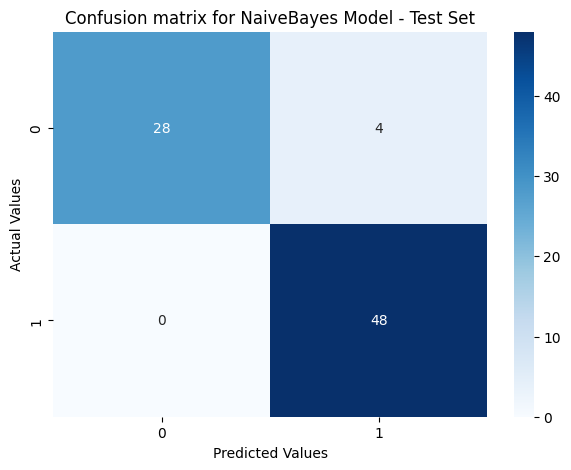

In [ ]:
plt.figure(figsize=(7,5))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for NaiveBayes Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
score=round(accuracy_score(y_test,y_pred),3)
print("Test accuracy: {}".format(score))

Test accuracy: 0.95


In [ ]:
# Creating a confusion matrix for training set
y_train_pred=nb.predict(X_train)
cm=confusion_matrix(y_train,y_train_pred)
cm

array([[122,   0],
       [ 30, 168]])

In [ ]:
# Accuracy score
score=round(accuracy_score(y_train,y_train_pred),3)
print("Train accuracy: {}".format(score))

Train accuracy: 0.906


In [ ]:
X_train=X_train[['hemo','rc','sg','al','sc','htn','sod','bp','wc','age']]
X_test=X_test[['hemo','rc','sg','al','sc','htn','sod','bp','wc','age']]
nb.fit(X_train,y_train)
def predict(hemo,rc,sg,al,sc,htn,sod,bp,wc,age):
    hemo=float(hemo)
    rc=float(rc)
    sg=float(sg)
    sc=float(sc)
    htn=int(htn)
    sod=float(sod)
    bp=float(bp)
    wc=float(wc)
    age=int(age)

    x=[[hemo,rc,sg,al,sc,htn,sod,bp,wc,age]]
    return nb.predict(x)

In [ ]:
# Prediction 1
# input parameter : Hemoglobin(hemo), Red Blood Cells(rc), Specific Gravity(sg), Albumin(al), Searum Creatinite(sc),
# Hypertension(htn), Sodium(sod), Blood Pressure(bp), White Blood Cells(wc), Age
prediction = predict(67.4,7.2,0.99,4,17.0,1,160.6,87,22089,36)[0]
if prediction:
  print('Chronic Kidney Disease detected.')
else:
  print("Chronic Kidney Disease not detected.")

Chronic Kidney Disease detected.


In [ ]:
# Prediction 2
# input parameter : Hemoglobin(hemo), Red Blood Cells(rc), Specific Gravity(sg), Albumin(al), Searum Creatinite(sc),
# Hypertension(htn), Sodium(sod), Blood Pressure(bp), White Blood Cells(wc), Age
prediction = predict(45.6,3.5,0.67,2,5.0,1,120.6,65,10000,20)[0]
if prediction:
  print('Chronic Kidney Disease detected.')
else:
  print("Chronic Kidney Disease not detected.")

Chronic Kidney Disease detected.


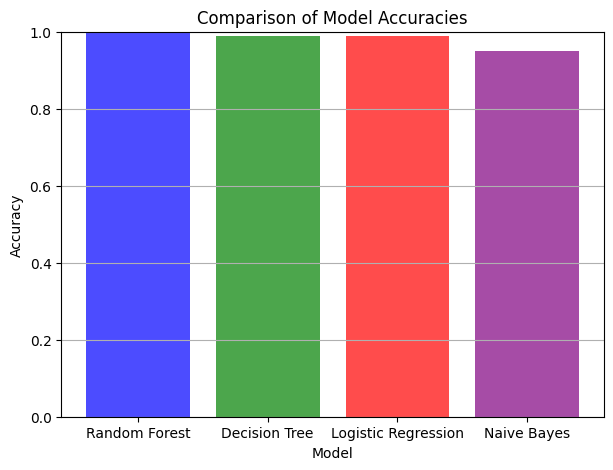

In [ ]:
import matplotlib.pyplot as plt

accuracies = {
    'Random Forest': 0.997,
    'Decision Tree': 0.988,
    'Logistic Regression': 0.988,
    'Naive Bayes': 0.95
}

models = list(accuracies.keys())
accuracy_values = list(accuracies.values())

x_pos = np.arange(len(models))

plt.figure(figsize=(7,5))
plt.bar(x_pos, accuracy_values, align='center', alpha=0.7, color=['blue', 'green', 'red', 'purple'])
plt.xticks(x_pos, models)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.grid(axis='y')

plt.show()
